<a href="https://colab.research.google.com/github/prashanth741/AIML/blob/main/assignment-A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_openml

In [2]:
car_data = fetch_openml(name='car', version=1, as_frame=True)
car_df = car_data.frame

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1027: UserWarning: Version 1 of dataset car is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/21/car.arff
  warn(


In [3]:
car_description = car_data.DESCR
feature_names = car_df.columns.tolist()
print(car_description)
print("Feature Names:", feature_names)

**Author**: Marko Bohanec, Blaz Zupan  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/car+evaluation) - 1997   
**Please cite**: [UCI](http://archive.ics.uci.edu/ml/citation_policy.html)  

**Car Evaluation Database**  
This database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX (M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.).

The model evaluates cars according to the following concept structure:
 
    CAR                      car acceptability
    . PRICE                  overall price
    . . buying               buying price
    . . maint                price of the maintenance
    . TECH                   technical characteristics
    . . COMFORT              comfort
    . . . doors              number of doors
    . . . persons            capacity in terms of persons to carry
    . . . lug_boot           the size of luggage boot
    . . safety               estim

In [4]:
print(car_df.info())
print(car_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   buying    1728 non-null   category
 1   maint     1728 non-null   category
 2   doors     1728 non-null   category
 3   persons   1728 non-null   category
 4   lug_boot  1728 non-null   category
 5   safety    1728 non-null   category
 6   class     1728 non-null   category
dtypes: category(7)
memory usage: 13.1 KB
None
       buying maint doors persons lug_boot safety  class
count    1728  1728  1728    1728     1728   1728   1728
unique      4     4     4       3        3      3      4
top      high  high     2       2      big   high  unacc
freq      432   432   432     576      576    576   1210


In [5]:
print(car_df.isnull().sum())

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


In [6]:
target_column = 'class'
X = car_df.drop(columns=[target_column])
y = car_df[target_column]

In [7]:
X_encoded = pd.get_dummies(X,
                           columns=X.select_dtypes(include=['object', 'category']).columns)

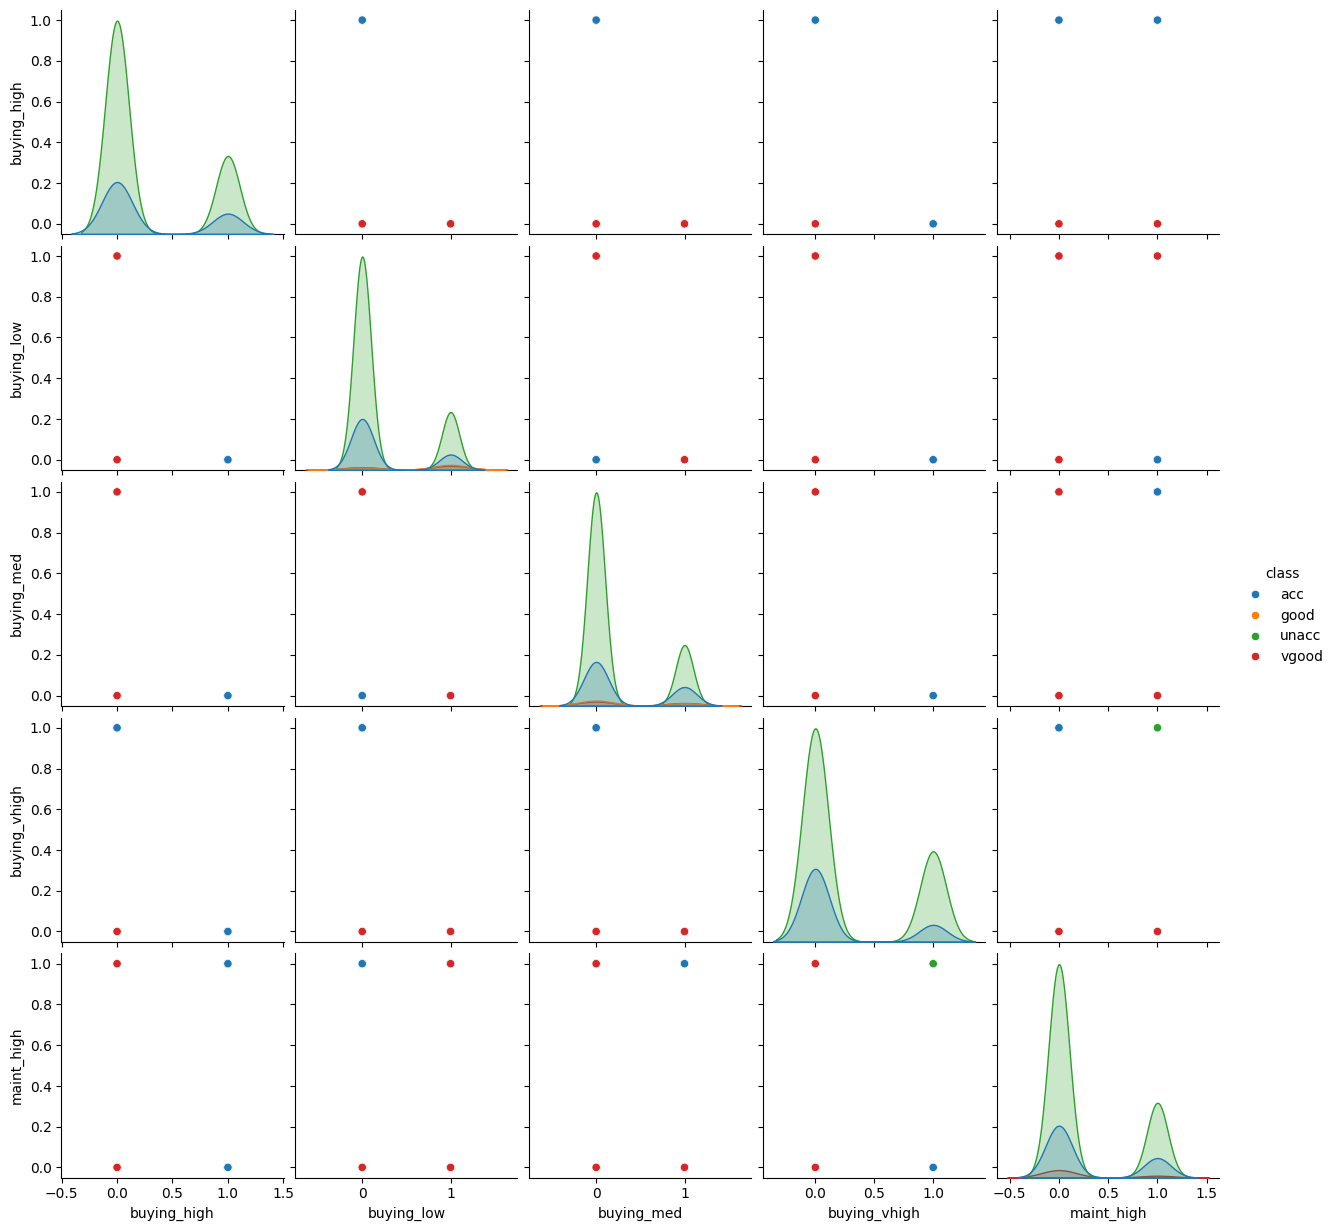

In [8]:
sns.pairplot(pd.concat([X_encoded, car_df[target_column]], axis=1),
             hue=target_column,
             vars=X_encoded.columns[:5])

In [9]:
plt.show()

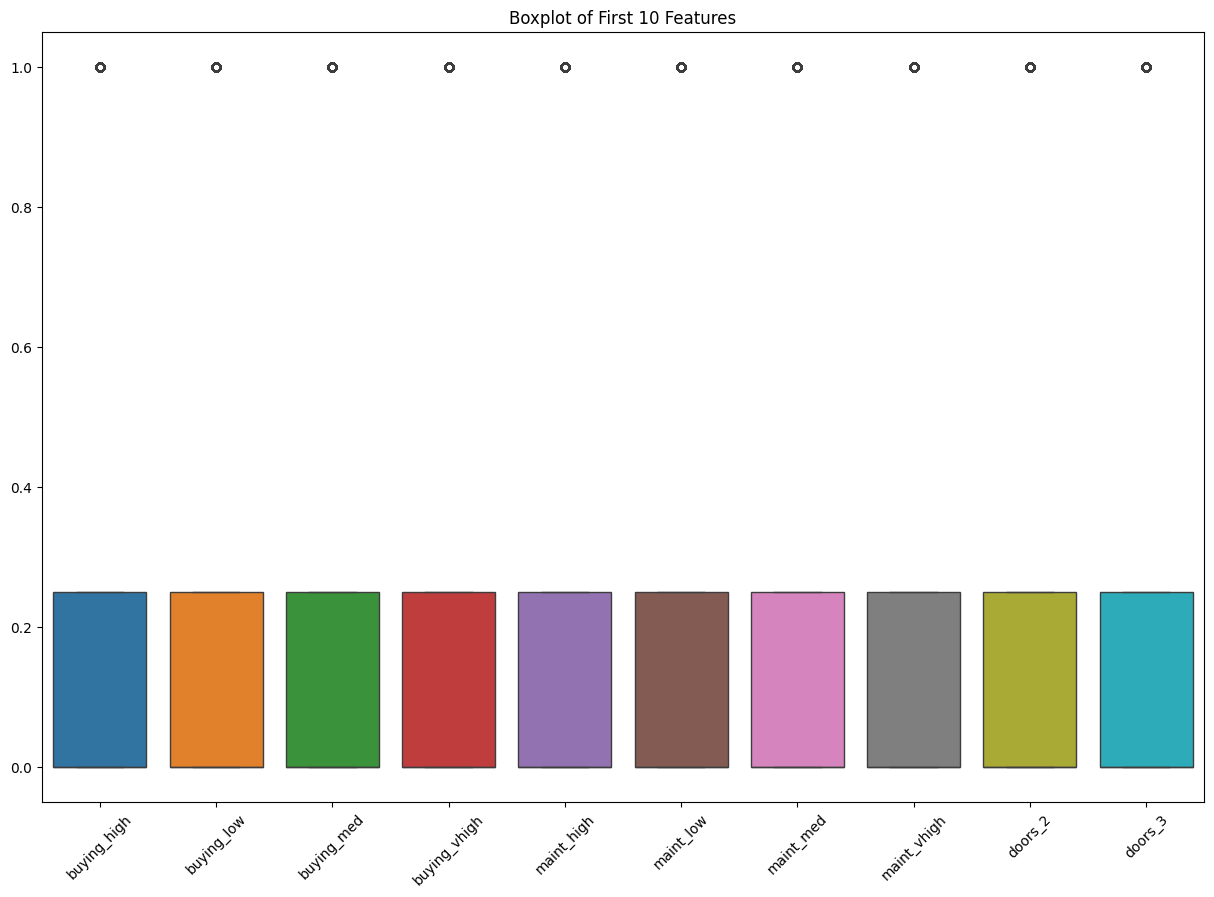

In [10]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=X_encoded.iloc[:, :10])
plt.xticks(rotation=45)
plt.title('Boxplot of First 10 Features')
plt.show()